# Visualization attempts


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import my_tools as mt

df_cases_new = mt.read_csv('cases_new')
df_cases_total = mt.read_csv('cases_total')
df_cases_relative = mt.read_csv('cases_relative')

df_deaths_new = mt.read_csv('deaths_new')
df_deaths_total = mt.read_csv('deaths_total')
df_deaths_relative = mt.read_csv('deaths_relative')

df_populations =  pd.read_csv('data/populations_2018.csv')

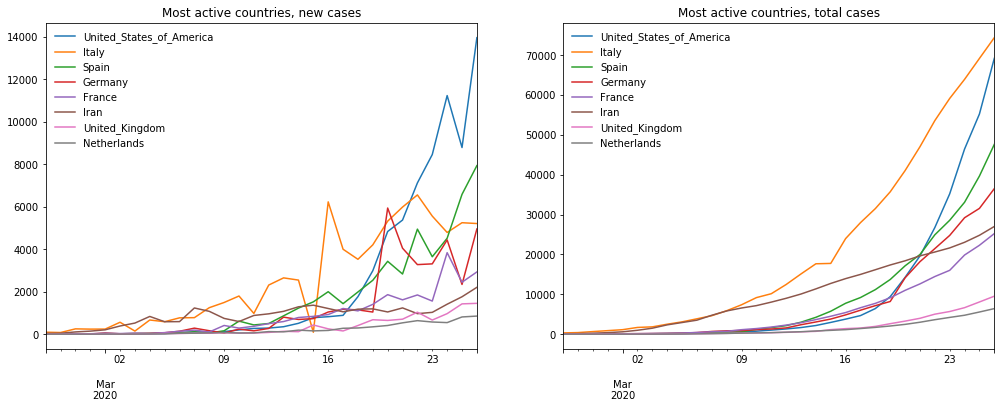

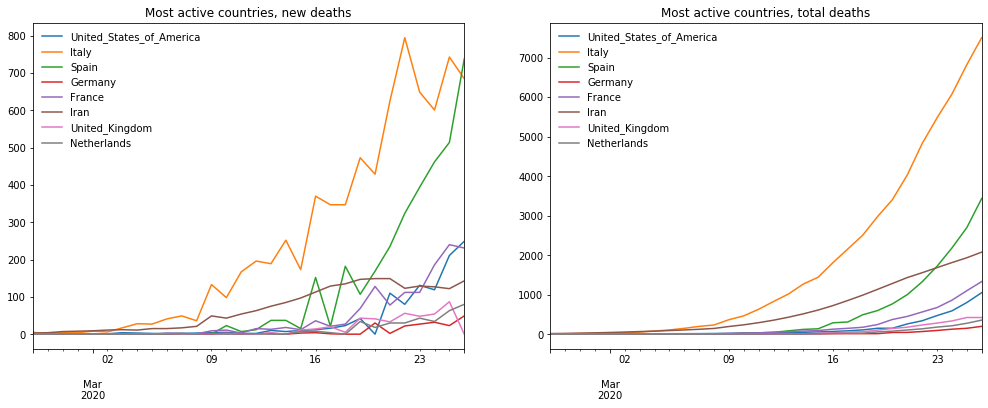

In [2]:
import my_tools as mt
import datetime

today= datetime.date.today()

worst_cases_new = mt.worst_in_cat(today, 'cases_new')
worst_deaths_new = mt.worst_in_cat(today, 'deaths_new')

most_active_today = worst_cases_new.intersection(worst_deaths_new)

df_deaths_most_new = df_deaths_new[most_active_today].tail(30)
df_deaths_most_new.name = 'Most active countries, new deaths'

df_cases_most_total = df_cases_total[most_active_today].tail(30)
df_cases_most_total.name = 'Most active countries, total cases'

df_deaths_most_total = df_deaths_total[most_active_today].tail(30)
df_deaths_most_total.name = 'Most active countries, total deaths'

df_cases_most_new = df_cases_new[most_active_today].tail(30)
df_cases_most_new.name = 'Most active countries, new cases'

mt.plot_side_by_side(df_cases_most_new, df_cases_most_total)
mt.plot_side_by_side(df_deaths_most_new, df_deaths_most_total)

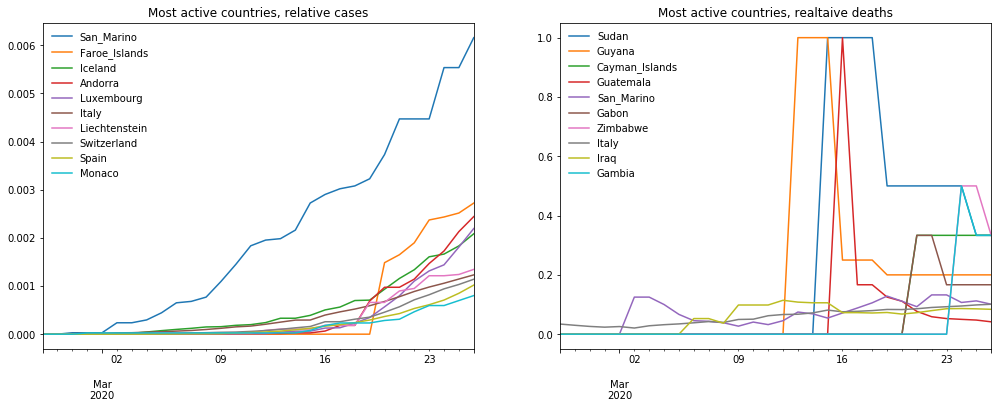

In [3]:
worst_cases_rel = mt.worst_in_cat(today, 'cases_relative')
worst_deaths_rel = mt.worst_in_cat(today, 'deaths_relative')

df_cases_most_relative = df_cases_relative[worst_cases_rel].tail(30)
df_cases_most_relative.name = 'Most active countries, relative cases'

df_deaths_most_relative = df_deaths_relative[worst_deaths_rel].tail(30)
df_deaths_most_relative.name = 'Most active countries, realtaive deaths'

mt.plot_side_by_side(df_cases_most_relative, df_deaths_most_relative)

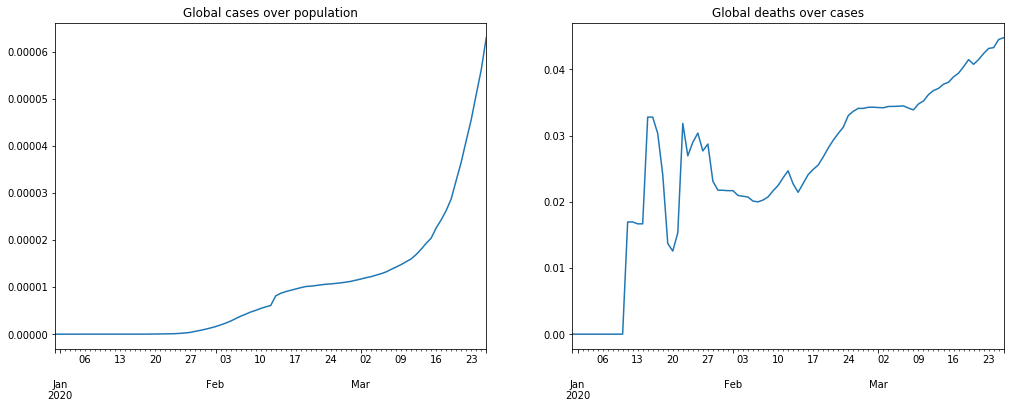

In [6]:
global_cases_relative = df_cases_total.sum(axis=1) / df_populations.sum(axis=0)[1]
global_cases_relative.name = 'Global cases over population'
global_deaths_relative  = df_deaths_total.sum(axis=1) / df_cases_total.sum(axis=1)
global_deaths_relative.name = 'Global deaths over cases'

mt.plot_side_by_side(global_cases_relative, global_deaths_relative, leg=False)